## Preprocessing

In [68]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dla-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [69]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns=['EIN','NAME'], axis=1, inplace=True)
application_df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [70]:
# Determine the number of unique values in each column.
application_df.nunique(axis=0)

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [71]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
app_type_s = application_df.groupby("APPLICATION_TYPE").size().sort_values(ascending=False)
app_type_s

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T14        3
T25        3
T29        2
T15        2
T17        1
dtype: int64

In [72]:
# Create df for automation of column name selection in next cells
app_type_df = app_type_s.to_frame(name='count')
app_type_df

,count
APPLICATION_TYPE,
T3,27037
T4,1542
T6,1216
T5,1173
T19,1065
T8,737
T7,725
T10,528
T9,156


In [73]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
cutoff_val = 500
application_types_to_replace = list(app_type_df.loc[app_type_df['count'] < cutoff_val].index)
application_types_to_replace

['T9', 'T13', 'T12', 'T2', 'T14', 'T25', 'T29', 'T15', 'T17']

In [74]:
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [75]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_s = application_df.groupby("CLASSIFICATION").size().sort_values(ascending=False)
# Create df for automation of column name selection in next cells
classification_df = classification_s.to_frame(name='count')
classification_df

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
...,...
C2190,1
C2380,1
C2500,1


In [76]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_df.loc[classification_df['count']>1]

,count
CLASSIFICATION,
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116


In [77]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
cutoff_val = 1000
classifications_to_replace = list(classification_df.loc[classification_df['count'] < cutoff_val].index)
classifications_to_replace

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [78]:
# Convert categorical data to numeric with `pd.get_dummies`
# Find categorical variables in df
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [79]:
# app_type_dummies = pd.get_dummies(application_df['APPLICATION_TYPE'])

def get_dummies_cat(col_name):
    result = pd.get_dummies(application_df[col_name])
    return result

app_type_dummies = get_dummies_cat('APPLICATION_TYPE')
affiliation_dummies = get_dummies_cat('AFFILIATION')
classification_dummies = get_dummies_cat('CLASSIFICATION')
use_case_dummies = get_dummies_cat('USE_CASE')
org_dummies = get_dummies_cat('ORGANIZATION')
income_amt_dummies = get_dummies_cat('INCOME_AMT')
special_cons_dummies = get_dummies_cat('SPECIAL_CONSIDERATIONS')

# Concatenate dummy df with application_df
application_trans_df = pd.concat([application_df, app_type_dummies, affiliation_dummies, classification_dummies, use_case_dummies,
                                  org_dummies, income_amt_dummies, special_cons_dummies], 
                                 axis=1)

# drop categorical fields
application_trans_df.drop(columns=application_cat, inplace=True)

# Display sample data
application_trans_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,Other,T10,T19,T3,T4,T5,T6,...,1-9999,10000-24999,100000-499999,10M-50M,1M-5M,25000-99999,50M+,5M-10M,N,Y
0,1,5000,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,108590,1,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,5000,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1,6692,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,142590,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [80]:
# Split our preprocessed data into our features and target arrays
# up to here
y = application_trans_df["IS_SUCCESSFUL"].values
X = application_trans_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [81]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [82]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
number_input_features

43

In [83]:
# Optimise: Increase number of nodes and add a hidden layer, change activation method
hidden_nodes_layer1 = 12
hidden_nodes_layer2 = 4
hidden_nodes_layer3 = 1

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 12)                528       
_________________________________________________________________
dense_56 (Dense)             (None, 4)                 52        
_________________________________________________________________
dense_57 (Dense)             (None, 1)                 5         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 2         
Total params: 587
Trainable params: 587
Non-trainable params: 0
_________________________________________________________________


In [84]:
# Compile the model
nn_new.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [85]:
# Train the model
# Optimise: increase number of epochs
fit_model = nn_new.fit(X_train_scaled,y_train,epochs=150)

Epoch 1/150
25724/25724 [==============================] - 2s 73us/sample - loss: 0.6662 - acc: 0.5959
Epoch 2/150
25724/25724 [==============================] - 2s 65us/sample - loss: 0.6031 - acc: 0.7263
Epoch 3/150
25724/25724 [==============================] - 2s 60us/sample - loss: 0.5875 - acc: 0.7277
Epoch 4/150
25724/25724 [==============================] - 2s 66us/sample - loss: 0.5791 - acc: 0.7283
Epoch 5/150
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5707 - acc: 0.7306
Epoch 6/150
25724/25724 [==============================] - 1s 54us/sample - loss: 0.5659 - acc: 0.7318
Epoch 7/150
25724/25724 [==============================] - 1s 50us/sample - loss: 0.5632 - acc: 0.7319
Epoch 8/150
25724/25724 [==============================] - 1s 58us/sample - loss: 0.5611 - acc: 0.7326
Epoch 9/150
25724/25724 [==============================] - 2s 65us/sample - loss: 0.5599 - acc: 0.7317
Epoch 10/150
25724/25724 [==============================] - 2s 61us/sampl

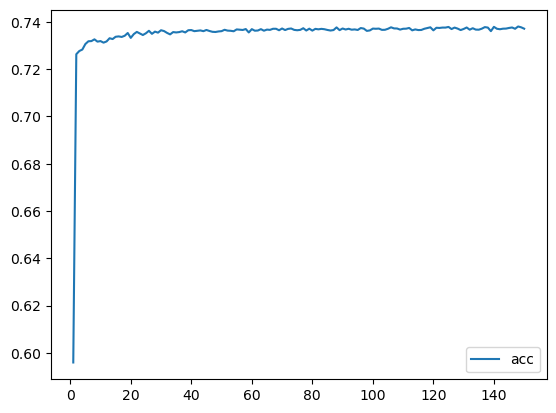

In [86]:
# Create a DataFrame containing training history
import matplotlib.pyplot as plt
optimise_history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
optimise_history_df.plot(y="acc")

plt.savefig('Images/optimise_accuracy.png')
plt.show()


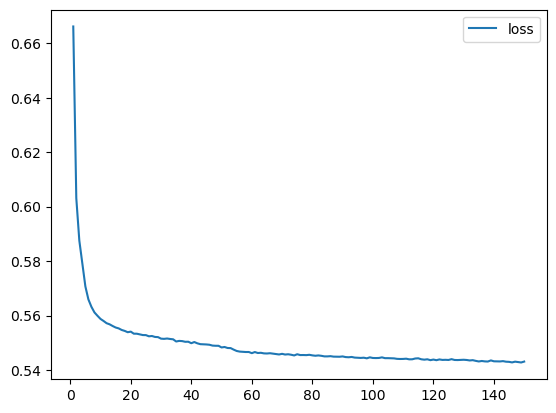

In [87]:
# Plot the loss
optimise_history_df.plot(y="loss")

plt.savefig('Images/optimise_loss.png')
plt.show()

In [88]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_new.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8575/8575 - 0s - loss: 0.5516 - acc: 0.7291
Loss: 0.551605944258131, Accuracy: 0.7290962338447571


In [89]:
# Export our model to HDF5 file
nn_new.save('AlphabetSoupCharity_Optimisation.h5')